# 가설검정

In [1]:
import numpy as np 
import pandas as pd 
import scipy.stats as stats  # 정규분포, t분포, 신뢰구간(z분포, t분포), 가설검정(z-test, t-test, paired t-test)
import statsmodels.stats.api as sms # 비율의 신뢰구간, 비율의 가설검정, two-sample ttest, 평균차의 신뢰구간

## 평균에 대한 검정

### 우측검정 예시

In [2]:
data1 = pd.read_csv("department.csv")
data1

,Accounts
0,116.65
1,87.09
2,328.01
3,75.73
4,211.82
...,...
395,162.00
396,337.28
397,230.45
398,237.37


In [3]:
xbar = data1['Accounts'].mean()
sigma = 65
n = len(data1)

# 가설검정(one sample z-test)
1-stats.norm.cdf(xbar, loc=170, scale=sigma/np.sqrt(n))

0.0069379221924117385

In [4]:
stats.norm.ppf(0.95, loc=170, scale=sigma/np.sqrt(n))

175.3457742875923

In [5]:
data1['Accounts'].std()

68.36697563255856

In [6]:
1-stats.t.cdf(2.340, df=n-1)

0.00988797117245388

In [7]:
stats.t.ppf(0.95, df=n-1)

1.6486815335554057

In [8]:
stats.ttest_1samp(data1, popmean=170, alternative='greater')

Ttest_1sampResult(statistic=array([2.33928733]), pvalue=array([0.00990659]))

### 좌측검정 예시

In [9]:
data2 = pd.read_csv("ketchup.csv")
data2

,Ketchup
0,15.8
1,16.0
2,16.2
3,15.7
4,15.4
5,16.1
6,16.2
7,17.3
8,15.0
9,16.8


In [10]:
xbar = data2['Ketchup'].mean()
s = data2['Ketchup'].std()
n = len(data2)
mu0= 16
print('Sample mean: ',xbar)
print('Sample St.Dev: ',s)

Sample mean:  15.900000000000002
Sample St.Dev:  0.5016638981097472


In [11]:
t_value = (xbar-mu0) / (s/np.sqrt(n))
t_value

-0.9966832412776215

In [12]:
stats.t.cdf(-0.997, df=n-1)

0.16435555565598453

In [13]:
stats.t.ppf(0.05, df=n-1)

-1.7108820799094282

In [14]:
stats.ttest_1samp(data2, popmean=16, alternative='less')

Ttest_1sampResult(statistic=array([-0.99668324]), pvalue=array([0.16443087]))

### 양측검정 예시

In [15]:
data3 = pd.read_csv("assembly_time.csv")
data3

,Time
0,145
1,128
2,153
3,141
4,119
...,...
95,140
96,134
97,157
98,103


In [16]:
xbar = data3['Time'].mean()
s = data3['Time'].std()
n = len(data3)
mu0= 130
print('Sample mean: ',xbar)
print('Sample St.Dev: ',s)

Sample mean:  126.8
Sample St.Dev:  14.482312444405203


In [17]:
t_value = (xbar-mu0) / (s/np.sqrt(n))
t_value

-2.2095918813270905

In [18]:
2*stats.t.cdf(-2.210, df=n-1)

0.02940876862806306

In [19]:
stats.t.ppf(0.025, df=n-1)

-1.9842169515086832

In [20]:
stats.ttest_1samp(data3, popmean=130, alternative='two-sided')

Ttest_1sampResult(statistic=array([-2.20959188]), pvalue=array([0.02943802]))

## 비율에 대한 검정

In [21]:
data4 = pd.read_csv("election.csv")
data4

,Votes
0,2
1,1
2,1
3,2
4,2
...,...
760,2
761,2
762,1
763,2


In [22]:
data4.value_counts()

Votes
2        407
1        358
dtype: int64

In [23]:
n = len(data4)
p_hat = data4.value_counts()[2]/n
p_hat

Votes
2        0.532026
dtype: float64

In [24]:
p0 = 0.5
Z_value = (p_hat-p0) / np.sqrt(p0*(1-p0)/n)
Z_value

Votes
2        1.771599
dtype: float64

In [25]:
1-stats.norm.cdf(Z_value, loc=0, scale=1)

array([0.03823059])

In [26]:
stats.norm.ppf(0.95, loc=0, scale=1)

1.6448536269514722

In [27]:
sms.proportions_ztest(count=data4.value_counts()[2], nobs=n, 
                      value=0.5, prop_var=0.5, alternative='larger')

(array([1.77159874]), array([0.03823059]))

## 분산에 대한 검정

In [28]:
popcorn = pd.DataFrame([198, 201, 199, 189, 200,
                    199, 198, 189, 205, 195])
s = popcorn.std(); print(s**2)

0    25.566667
dtype: float64


In [29]:
n = len(popcorn); print("n:", n); df=n-1; 
print("chi-square critical value =", stats.chi2.ppf(0.95, df))
test_stat=(n-1)* s**2/25; 
print("test stat=", test_stat.values)
print("P-value=",1-stats.chi2.cdf(test_stat, df))

n: 10
chi-square critical value = 16.918977604620448
test stat= [9.204]
P-value= [0.41866044]


## 두 모집단 평균차이에 대한 검정

### 등분산

In [30]:
data5 = pd.read_csv("chair.csv")
data5

,Method A,Method B
0,6.8,5.2
1,5.0,6.7
2,7.9,5.7
3,5.2,6.6
4,7.6,8.5
5,5.0,6.5
6,5.9,5.9
7,5.2,6.7
8,6.5,6.6
9,7.4,4.2


In [31]:
data5.mean()

Method A    6.288
Method B    6.016
dtype: float64

In [32]:
data5.var()

Method A    0.847767
Method B    1.303067
dtype: float64

In [33]:
2*(1-stats.t.cdf(0.9273, df=25+25-2))

0.35841023759624013

In [34]:
stats.t.ppf(0.975, df=25+25-2)

2.0106347546964454

In [35]:
stats.ttest_ind(data5['Method A'], data5['Method B'], 
                equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=0.9273326034699476, pvalue=0.3583934877441609)

### 이분산

In [36]:
data6 = pd.read_csv("cereal.csv")
data6

,Consumers,Nonconsumers
0,568.0,705
1,498.0,819
2,589.0,706
3,681.0,509
4,540.0,613
...,...,...
102,NaN,594
103,NaN,596
104,NaN,750
105,NaN,582


In [37]:
data6.mean()

Consumers       604.023256
Nonconsumers    633.233645
dtype: float64

In [38]:
data6.var()

Consumers        4102.975637
Nonconsumers    10669.765650
dtype: float64

In [39]:
stats.t.cdf(-2.091, df=123)

0.019293184097103244

In [40]:
stats.t.ppf(0.05, df=123)

-1.6573363970416897

In [41]:
stats.ttest_ind(data6['Consumers'], data6['Nonconsumers'], 
                equal_var=False, alternative='less',
                nan_policy='omit')

Ttest_indResult(statistic=-2.091073158629056, pvalue=0.019293211531347474)

### 등분산 검정

In [42]:
f = data5['Method A'].var()/data5['Method B'].var()
df1 = data5['Method A'].count()-1
df2 = data5['Method B'].count()-1
stats.f.cdf(f, df1, df2)

0.14960564238494933

In [43]:
f = data6['Consumers'].var()/data6['Nonconsumers'].var()
df1 = data6['Consumers'].count()-1
df2 = data6['Nonconsumers'].count()-1
stats.f.cdf(f, df1, df2)

0.0003684331512590764

# 정규성 검정

### Q-Q plot

In [44]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv("iris.csv")
data7 = df['Sepal_Length']

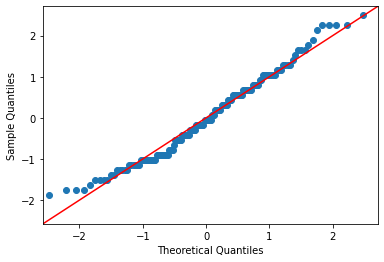

In [46]:
sm.qqplot(data7, fit=True, line='45')
plt.show()

### Shapiro-Wilks 검정

In [47]:
from scipy import stats

In [48]:
stats.shapiro(data7)

ShapiroResult(statistic=0.9760897755622864, pvalue=0.01017984002828598)

### Kolmogorov-Smirnov 검정

In [49]:
m1=data7.mean()
s1=data7.std()
x1=(data7-m1)/s1
stats.kstest(x1, stats.norm.cdf)

KstestResult(statistic=0.08865361377316261, pvalue=0.1781373784859167)

### Box-Cox transformation

In [50]:
lambdas = np.linspace(-2, 2)
loglikelihood = np.zeros(lambdas.shape, dtype=float)
for i, l in enumerate(lambdas):
    loglikelihood[i] = stats.boxcox_llf(l, data7)
lambda_optimal = stats.boxcox(data7)[1] 
lambda_optimal

-0.14475075607687585

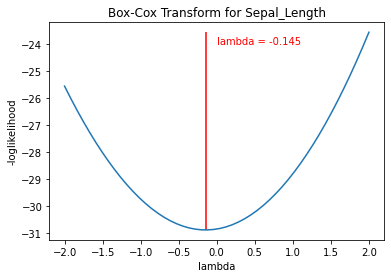

In [51]:
fit_boxcox = pd.DataFrame({'lambda': lambdas, '-loglikelihood': -loglikelihood})
sns.lineplot(data=fit_boxcox, x='lambda', y='-loglikelihood')
plt.title("Box-Cox Transform for Sepal_Length")
plt.vlines(lambda_optimal,ymin = fit_boxcox.iloc[:,1].min(), ymax = fit_boxcox.iloc[:,1].max(), color = 'red')
plt.text(x = 0.0, y = -24, s = "lambda = " + str(np.round(lambda_optimal,3)), color = 'red')
plt.show()

In [52]:
stats.shapiro(np.log(data7))

ShapiroResult(statistic=0.9825286269187927, pvalue=0.05387596786022186)

In [53]:
m2=np.log(data7).mean()
s2=np.log(data7).std()
x2=(np.log(data7)-m2)/s2
stats.kstest(x2, stats.norm.cdf)

KstestResult(statistic=0.08753842709906018, pvalue=0.18909147691675066)